In [1]:
# set up enviroment
from __future__ import division
import sys
import numpy as np
import pandas as pd 
import scipy
import importlib
import scanpy as sc

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import hdbscan
import scanpy as sc
import sklearn
from harmony import harmonize
sns.set_style("ticks")
sns.set_context("talk")

sys.path.append("../resources/")
import sct

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(figsize=[5,5],dpi_save=600)

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


import data

In [3]:
# annotated
adata_all = sc.read_h5ad('../data/24h_PN_all_figure.h5ad')
adata_all

AnnData object with n_obs × n_vars = 1784 × 17474 
    obs: 'n_counts', 'n_genes', 'genotype', 'PN_type', 'prev_decoded'
    var: 'highly_variable'
    uns: 'PN_type_colors', 'genotype_colors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [4]:
df_libs = pd.read_csv("../data/libs.csv", sep="\t", header=0, index_col=0) # sample info

# split #28

In [5]:
# select only split28
selector = ( (adata_all.obs['genotype'] == 'split28-GFP')|
            (adata_all.obs['genotype'] == 'GH146-GFP'))
adata_split28 = adata_all[selector]

In [6]:
adata_split28.obs['genotype'].value_counts()

GH146-GFP      946
split28-GFP    104
Name: genotype, dtype: int64

In [7]:
ICIM = adata_split28.var['highly_variable']
df_ICIM = adata_split28.to_df()[ICIM.index[ICIM]].T

In [8]:
myTSNE = sct.TSNE(df_ICIM, adata_split28.to_df().T, df_libs)
myTSNE.calc_TSNE(perplexity=15, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)

[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 0.139714
[t-SNE] Iteration 50: error = 13.8703577, gradient norm = 0.0781483 (50 iterations in 1.938s)
[t-SNE] Iteration 100: error = 12.9236613, gradient norm = 0.0524388 (50 iterations in 1.778s)
[t-SNE] Iteration 150: error = 12.4372756, gradient norm = 0.0526162 (50 iterations in 1.846s)
[t-SNE] Iteration 200: error = 12.3526743, gradient norm = 0.0475741 (50 iterations in 1.838s)
[t-SNE] Iteration 250: error = 12.2905606, gradient norm = 0.0313970 (50 iterations in 1.766s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 12.290561
[t-SNE] Iteration 300: error = 1.0576522, gradient norm = 0.0013600 (50 iterations in 1.786s)
[t-SNE] Iteration 350: error = 0.9353131, gradient norm = 0.0006490 (50 iterations in 1.812s)
[t-SNE] Iteration 400: error = 0.8876047, gradient norm = 0.0004053 (50 iterations in 1.794s)
[t-SN

In [9]:
adata_split28.obsm['X_tsne'] = myTSNE.X_tsne

In [10]:
adata_split28.uns['genotype_colors'] = ['#b9bbbd', '#f79b34']

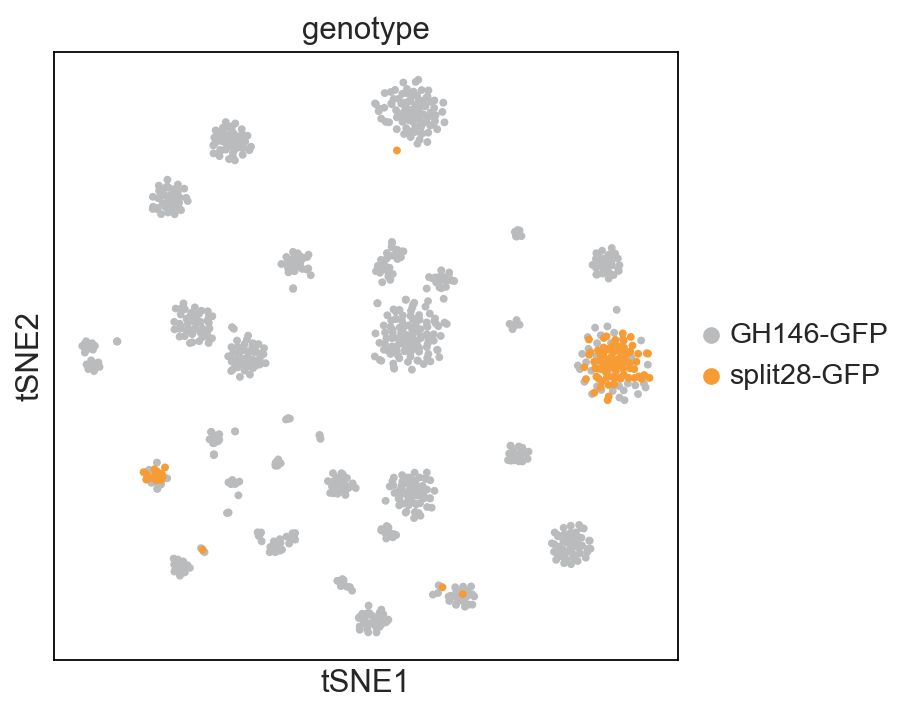

In [11]:
sc.pl.tsne(adata_split28, color='genotype', size=(50,50))#, save='_genotype.pdf')

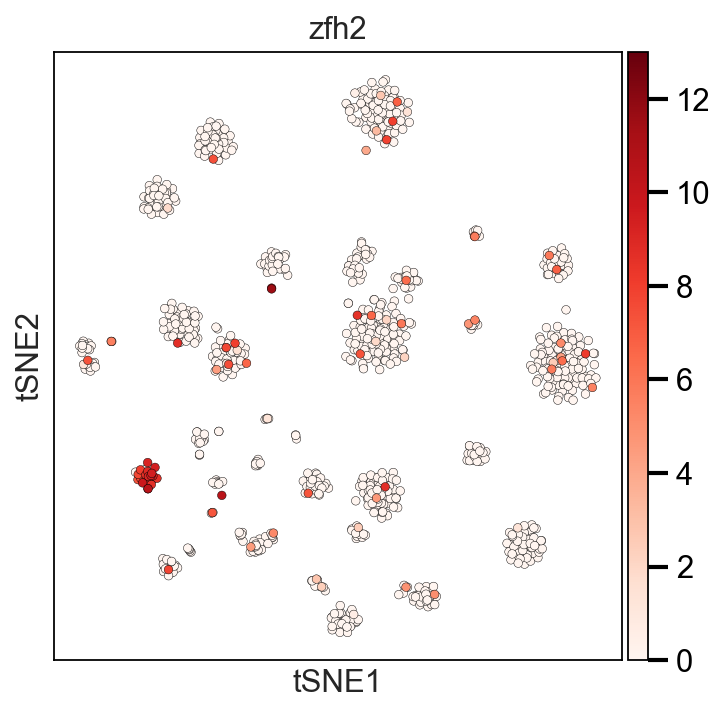

In [26]:
# sc.set_figure_params(figsize=(5,5))
myGenes = ['zfh2']
# myGenes = ['CG33543','CG32982','CG34353']
for gene in myGenes:
    sc.pl.tsne(adata_split28, color=gene, size=(60,60), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_'+gene+'.pdf')

# split #7

In [12]:
selector = ((adata_all.obs['genotype'] == 'GH146-GFP') | 
            (adata_all.obs['genotype'] == 'split7-GFP') )
# selector = (adata_all.obs['genotype'] == 'split7-GFP')
adata_split7 = adata_all[selector]
adata_split7.obs['genotype'].value_counts()

GH146-GFP     946
split7-GFP    344
Name: genotype, dtype: int64

In [13]:
# calculate pca
sc.pp.pca(adata_split7, svd_solver='arpack', use_highly_variable=True, random_state=2)
# use harmony to correct batch effect
adata_split7.obsm['X_pca'] = harmonize(adata_split7.obsm['X_pca'], adata_split7.obs, batch_key=['genotype'])

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:00)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
Reach convergence after 3 iteration(s).


In [14]:
# calculate tsne
sc.tl.tsne(adata_split7, n_pcs=20, perplexity=10, learning_rate=250, 
           early_exaggeration=4.0, random_state=1)

computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:05)


In [15]:
adata_split7.uns['genotype_colors'] = ['#b9bbbd','#ffaa4a']

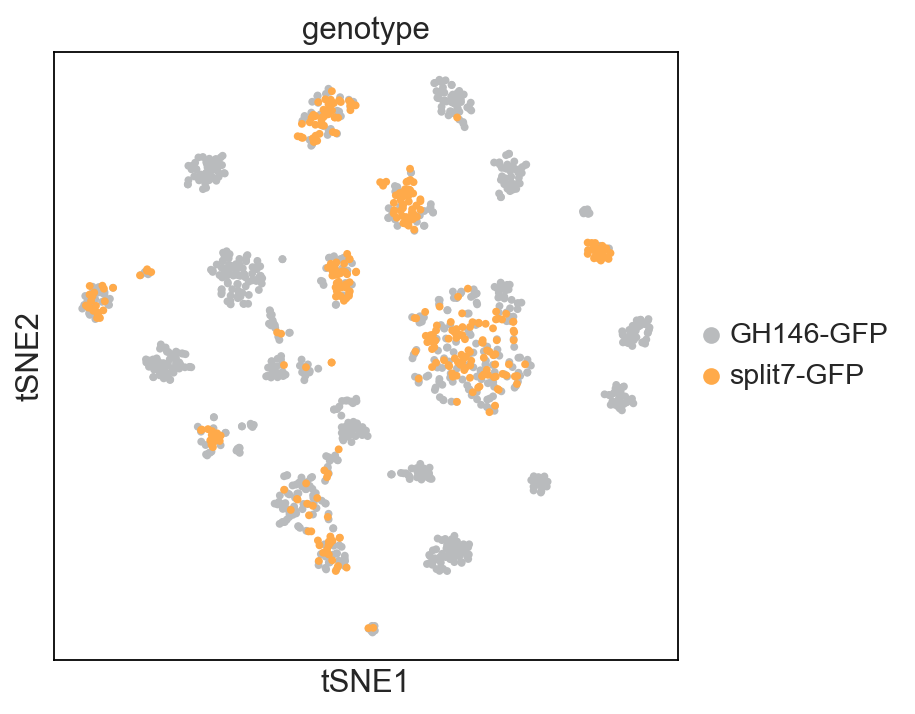

In [16]:
sc.pl.tsne(adata_split7, color='genotype', size=(50,50))#, save='_genotype.pdf')

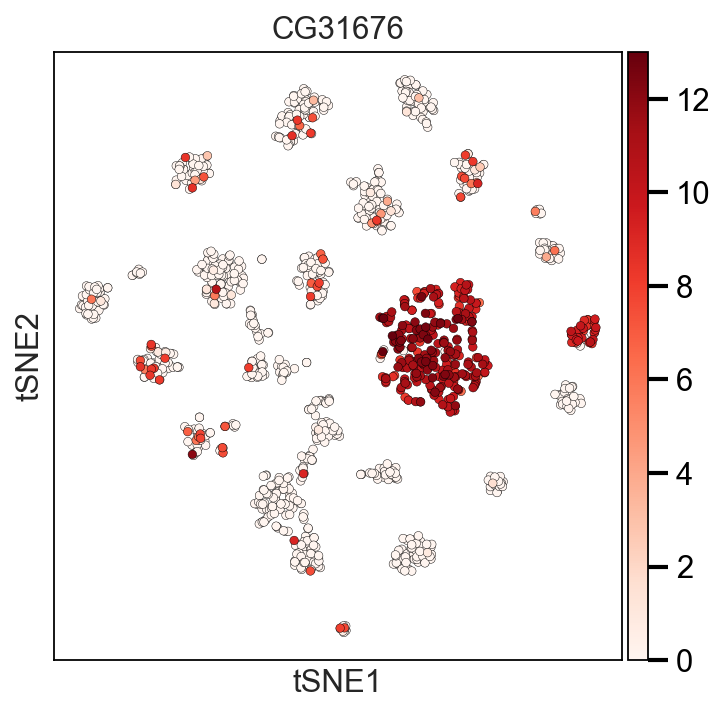

In [8]:
# myGenes =['acj6', 'vvl', 'C15','CG31676']
# myGenes = ['danr','DIP-zeta','DIP-beta', 'AstA', 'DIP-eta']
myGenes =['CG31676']
for gene in myGenes:
    sc.pl.tsne(adata_split7, color=gene, size=(60,60), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_'+gene+'.pdf')

# plot knot and DIP-beta expression in GH146+ PNs

In [33]:
selector = (adata_all.obs['genotype'] == 'GH146-GFP') 
adata_GH146 = adata_all[selector]

In [34]:
# calculate pca
sc.pp.pca(adata_GH146, svd_solver='arpack', use_highly_variable=True, random_state=1)
# calculate tsne
sc.tl.tsne(adata_GH146, n_pcs=20, perplexity=10, learning_rate=250, 
           early_exaggeration=4.0, random_state=1)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:03)


In [36]:
sc.settings.set_figure_params(figsize=[5,5],dpi_save=600)

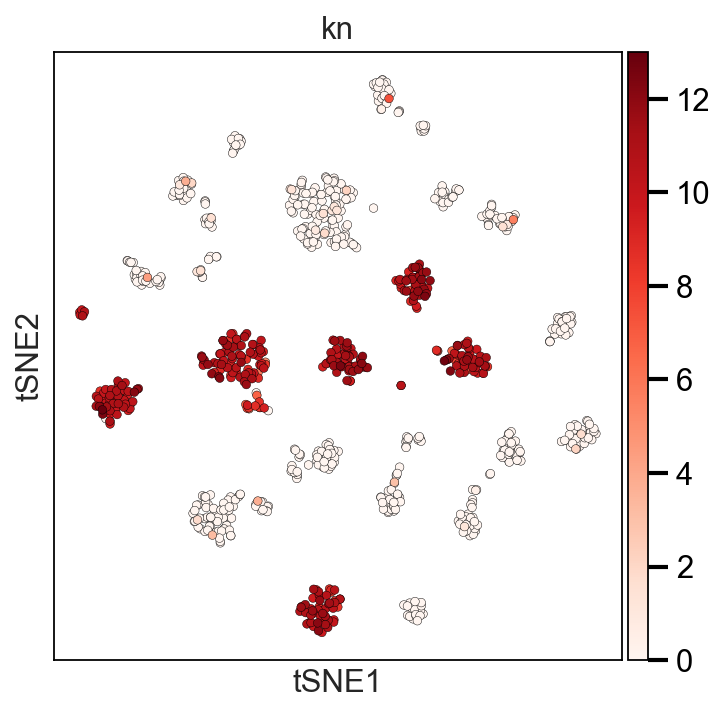

In [38]:
sc.pl.tsne(adata_GH146, color='kn', size=(60,60), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_kn.pdf')

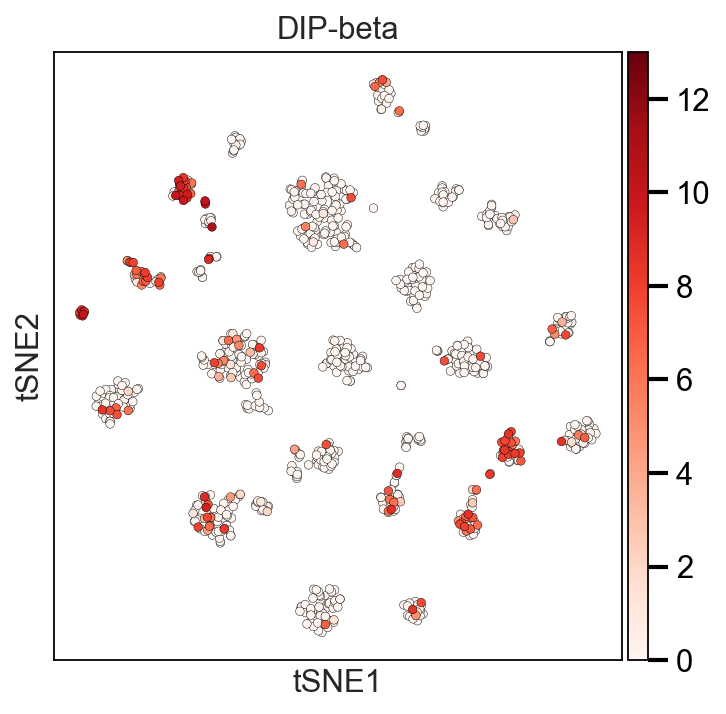

In [39]:
sc.pl.tsne(adata_GH146, color='DIP-beta', size=(60,60), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_GH146_DIP-beta.pdf')

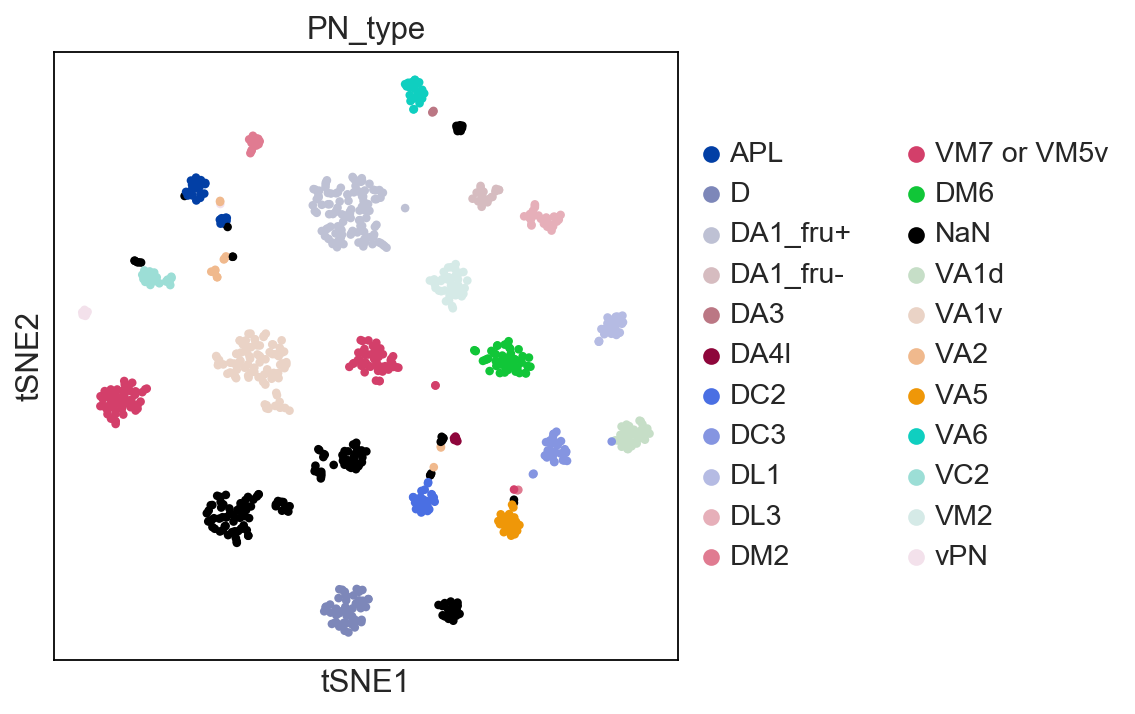

In [41]:
sc.pl.tsne(adata_GH146, color='PN_type', size=(60,60))

# plot knot

In [6]:
adata_kn_15 = adata_all[(adata_all.obs.genotype == 'kn-GFP') | (adata_all.obs.genotype == 'split15-GFP')]
adata_kn_15

View of AnnData object with n_obs × n_vars = 203 × 17474 
    obs: 'n_counts', 'n_genes', 'genotype', 'PN_type', 'prev_decoded'
    var: 'highly_variable'
    uns: 'PN_type_colors', 'genotype_colors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [15]:
ICIM = adata_kn_15.var['highly_variable']
df_ICIM = adata_kn_15.to_df()[ICIM.index[ICIM]].T
myTSNE = sct.TSNE(df_ICIM, adata_kn_15.to_df().T, df_libs)
myTSNE.calc_TSNE(perplexity=10, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)

[t-SNE] Computed conditional probabilities for sample 203 / 203
[t-SNE] Mean sigma: 0.138667
[t-SNE] Iteration 50: error = 16.1416160, gradient norm = 0.2309646 (50 iterations in 0.108s)
[t-SNE] Iteration 100: error = 15.3694727, gradient norm = 0.2388782 (50 iterations in 0.111s)
[t-SNE] Iteration 150: error = 14.5285895, gradient norm = 0.2381814 (50 iterations in 0.108s)
[t-SNE] Iteration 200: error = 15.0595493, gradient norm = 0.2248154 (50 iterations in 0.109s)
[t-SNE] Iteration 250: error = 14.7516401, gradient norm = 0.2300510 (50 iterations in 0.108s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 14.751640
[t-SNE] Iteration 300: error = 0.7001753, gradient norm = 0.0063831 (50 iterations in 0.115s)
[t-SNE] Iteration 350: error = 0.6696277, gradient norm = 0.0019013 (50 iterations in 0.107s)
[t-SNE] Iteration 400: error = 0.6573139, gradient norm = 0.0007034 (50 iterations in 0.110s)
[t-SNE] Iteration 450: error = 0.6514605, gradient norm = 0.0004710 (50 i

In [18]:
sc.settings.set_figure_params(figsize=[3,3],dpi_save=600)

In [21]:
adata_kn_15.uns['genotype_colors'] = ['#67e02b','#aa40fc']

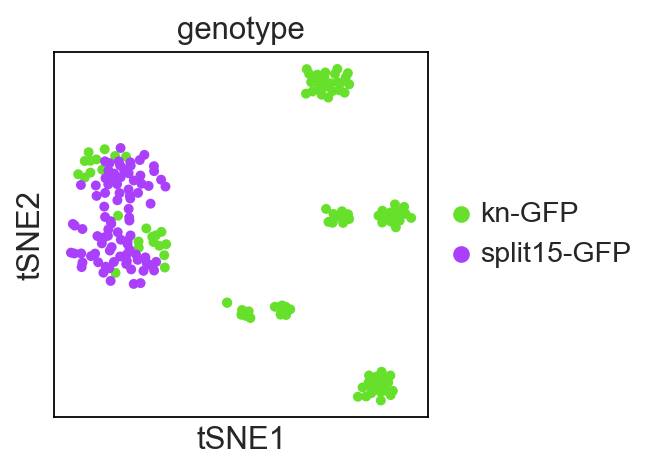

In [30]:
adata_kn_15.obsm['X_tsne'] = myTSNE.X_tsne
sc.pl.tsne(adata_kn_15, color='genotype',size=(80,80), save='_kn_split15_genotype.pdf')

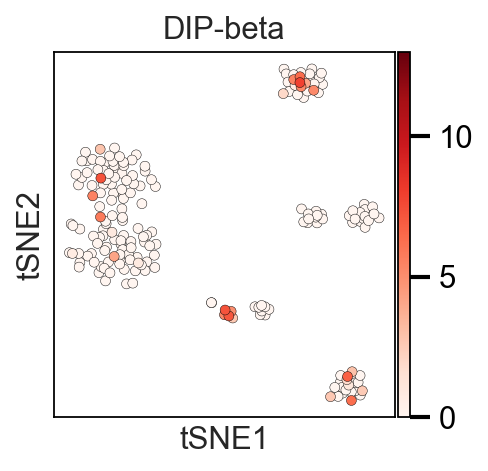

In [32]:
# myGenes =['kn', 'acj6', 'Lim1','trol','danr','C15']
myGenes =['DIP-beta']
for gene in myGenes:
    sc.pl.tsne(adata_kn_15, color=gene, size=(80,80), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_'+gene+'.pdf')

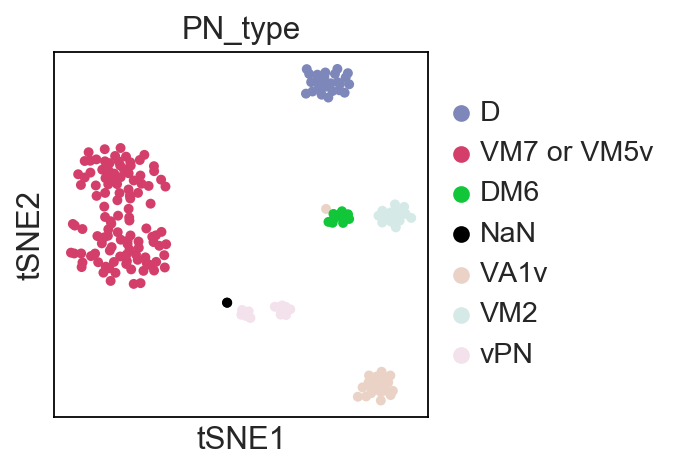

In [25]:
sc.pl.tsne(adata_kn_15, color='PN_type',size=(80,80))

# GH146 with kn

In [63]:
selector = ((adata_all.obs['genotype'] == 'GH146-GFP') | 
            (adata_all.obs['genotype'] == 'kn-GFP'))
adata_GH146_kn = adata_all[selector]

In [77]:
# calculate pca
sc.pp.pca(adata_GH146_kn, svd_solver='arpack', use_highly_variable=True, random_state=1)
# use harmony to correct batch effect
adata_GH146_kn.obsm['X_pca'] = harmonize(adata_GH146_kn.obsm['X_pca'], adata_GH146_kn.obs, batch_key=['genotype'])
# # calculate tsne
sc.tl.tsne(adata_GH146_kn, n_pcs=30, perplexity=10, learning_rate=250, 
           early_exaggeration=4.0, random_state=1)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:00)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
Reach convergence after 8 iteration(s).
computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:04)


In [89]:
adata_GH146_kn

AnnData object with n_obs × n_vars = 1060 × 17474 
    obs: 'n_counts', 'n_genes', 'genotype', 'PN_type', 'prev_decoded'
    var: 'highly_variable'
    uns: 'PN_type_colors', 'genotype_colors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

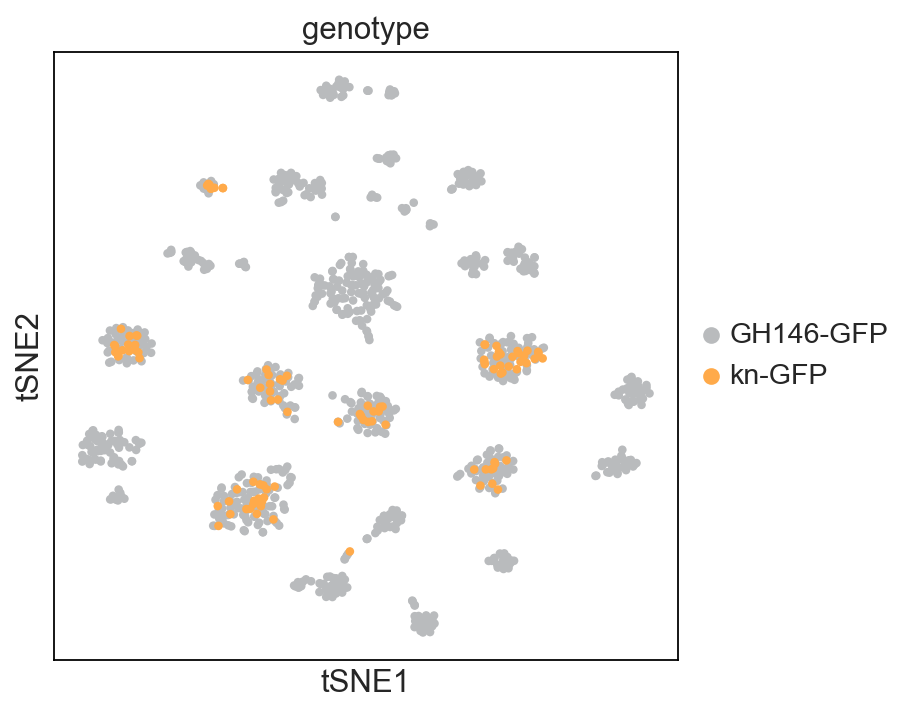

In [99]:
adata_GH146_kn.uns['genotype_colors'] = ['#b9bbbd','#ffaa4a']
sc.pl.tsne(adata_GH146_kn, color=['genotype'], size=(60,60), save='_genotype.pdf')

# dot plot for markers

In [5]:
selector = ((adata_all.obs['genotype'] == 'GH146-GFP') | 
            ((adata_all.obs['genotype'] == 'split7-GFP') & (adata_all.obs['PN_type'] != 'DA1_fru+'))|
            ((adata_all.obs['genotype'] == 'split28-GFP') & (adata_all.obs['PN_type'] == 'DA4l')))
adata_select = adata_all[selector]

In [6]:
# calculate pca
sc.pp.pca(adata_select, svd_solver='arpack', use_highly_variable=True, random_state=2)
# use harmony to correct batch effect
adata_select.obsm['X_pca'] = harmonize(adata_select.obsm['X_pca'], adata_select.obs, batch_key=['genotype'])
# # calculate tsne
sc.tl.tsne(adata_select, n_pcs=30, perplexity=10, learning_rate=250, 
           early_exaggeration=4.0, random_state=1)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:00)
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
Reach convergence after 2 iteration(s).
computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:04)


In [7]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3).fit(adata_select.obsm['X_tsne'])
labels_HDBSCAN = clusterer.labels_
print("Clusters", max(labels_HDBSCAN)+1)
adata_select.obs['HDBSCAN'] = pd.Series([str(i) for i in labels_HDBSCAN], index=adata_select.obs.index)

Clusters 35


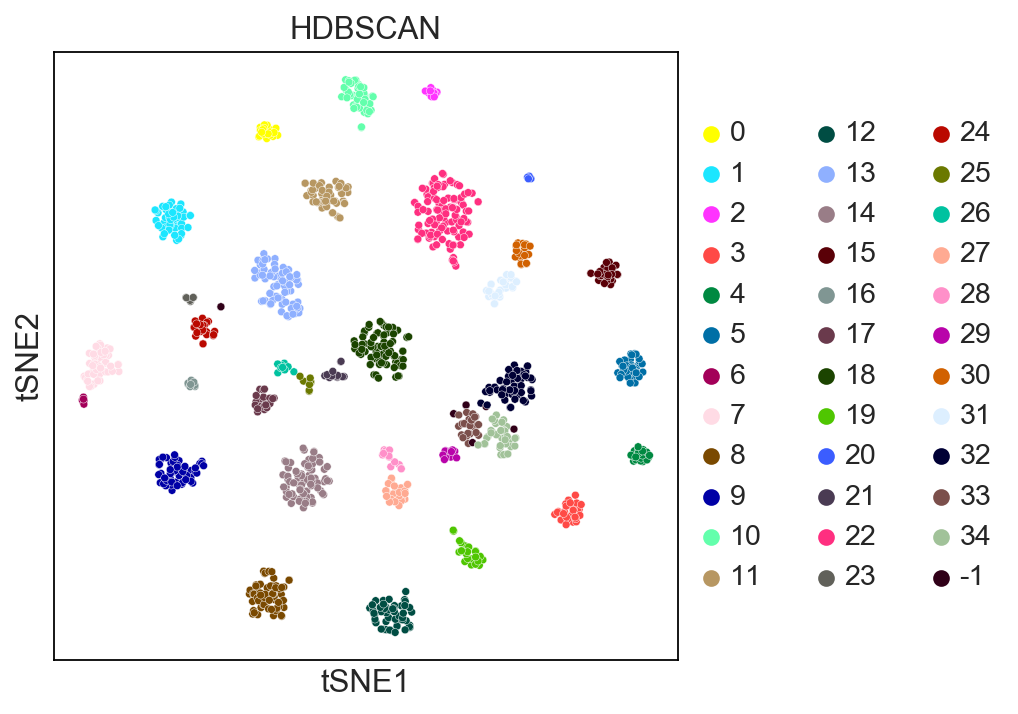

In [9]:
sc.pl.tsne(adata_select, color='HDBSCAN', size=(50,50),
           edgecolor="w", linewidths=0.2)#, save='_HDBSCAN_minSize5_minSample3.pdf')

In [10]:
adata_select.obs['PN_type'] = adata_select.obs['PN_type'].cat.add_categories(['VM7 or VM5v #1', 'VM7 or VM5v #2'])
adata_select.obs['PN_type'][np.in1d(adata_select.obs['HDBSCAN'], ['15'])] = 'VM7 or VM5v #1'
adata_select.obs['PN_type'][np.in1d(adata_select.obs['HDBSCAN'], ['11'])] = 'VM7 or VM5v #2'
adata_select.obs['PN_type'] = adata_select.obs['PN_type'].cat.remove_categories(['VM7 or VM5v'])

In [11]:
adata_select.obs['PN_type'] = adata_select.obs['PN_type'].cat.rename_categories({'NaN': 'not decoded'})
new_order = ['DC2','DL3','DA1_fru+','DA1_fru-','VA1d','DC3','DA4l',
             'DL1','VA6','VA2','DA3','VA5','DM2','VC2',
             'VA1v','D','VM2','VM7 or VM5v #1','VM7 or VM5v #2','DM6',
             'APL','vPN','not decoded']
adata_select.obs['PN_type'] = adata_select.obs['PN_type'].cat.reorder_categories(new_order)
adata_select.uns['PN_type_colors'][-1] = '#000000'

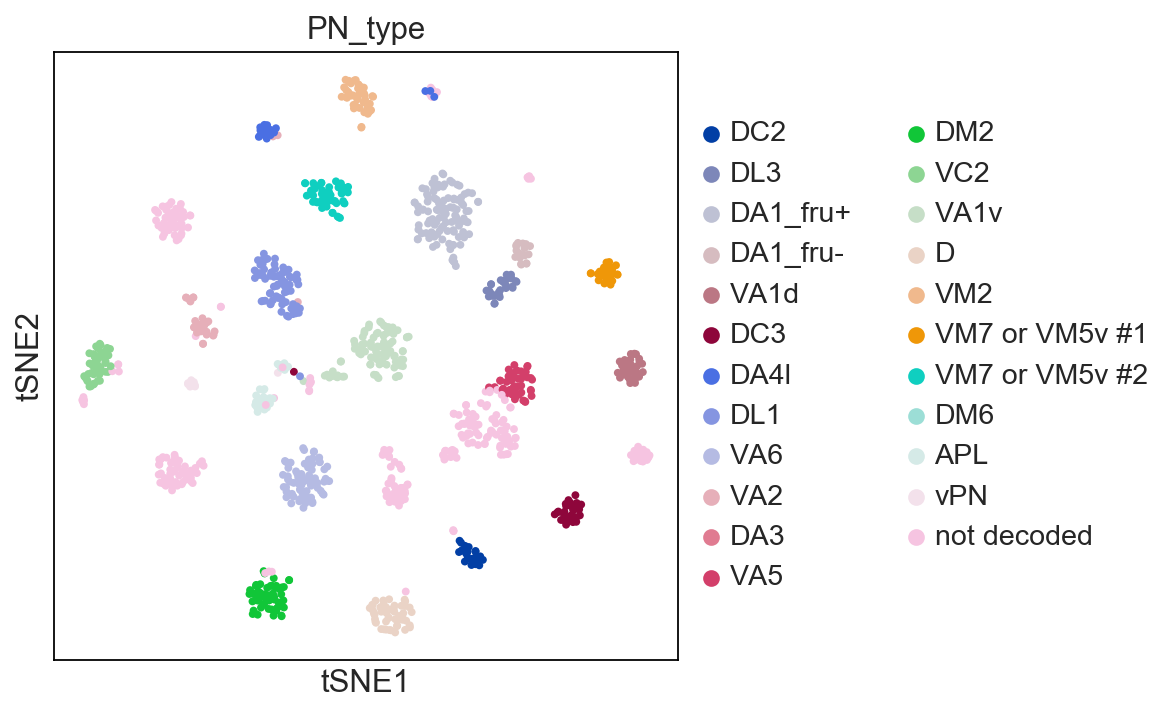

In [12]:
sc.pl.tsne(adata_select, color='PN_type', size=(50,50),legend_loc='right margin')

In [ ]:
sc.settings.set_figure_params(figsize=[5,5],dpi_save=600)

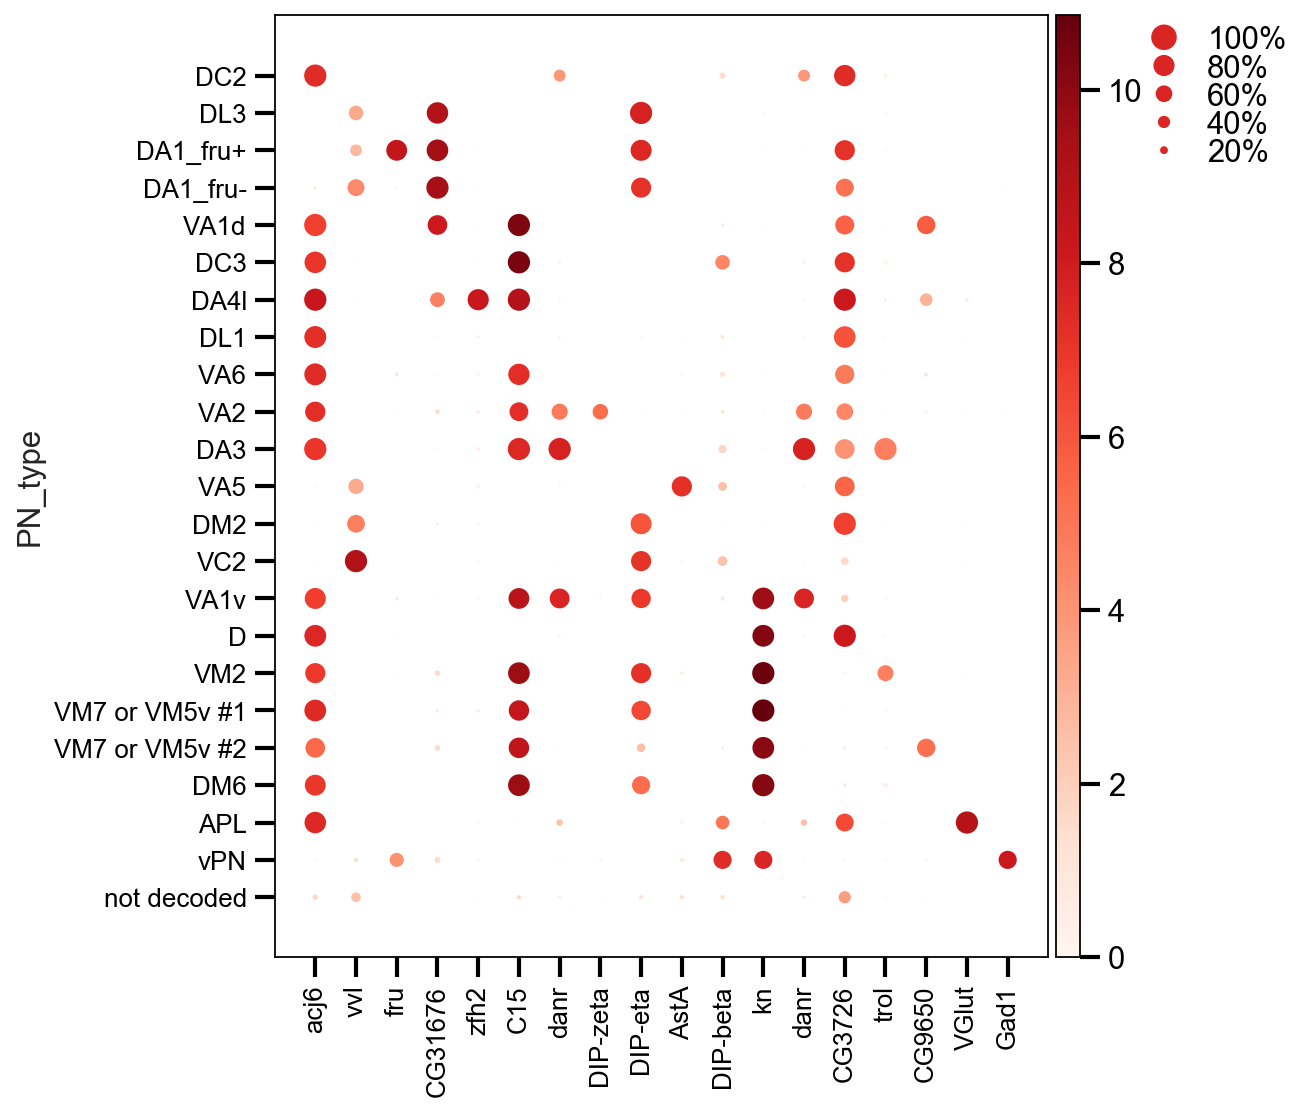

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[6.3, 0, 0.2, 0.5, 0.25])

In [103]:
genes = ['acj6','vvl','fru','CG31676','zfh2','C15','danr','DIP-zeta','DIP-eta',
         'AstA','DIP-beta','kn','danr','CG3726','trol','CG9650','VGlut','Gad1']
sc.pl.dotplot(adata_select, genes, groupby='PN_type', use_raw=None, save='_markers.pdf')